In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
df = sns.load_dataset("titanic")

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.drop("deck",axis=1,inplace=True)

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [15]:
df["age"].fillna(df["age"].mean(),inplace = True)

/tmp/ipython-input-3886218250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(),inplace = True)


In [16]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["float64","int64"]).columns
print(f"Numerical: {numerical}\nCategory: {categorical}")

Numerical: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Category: Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')


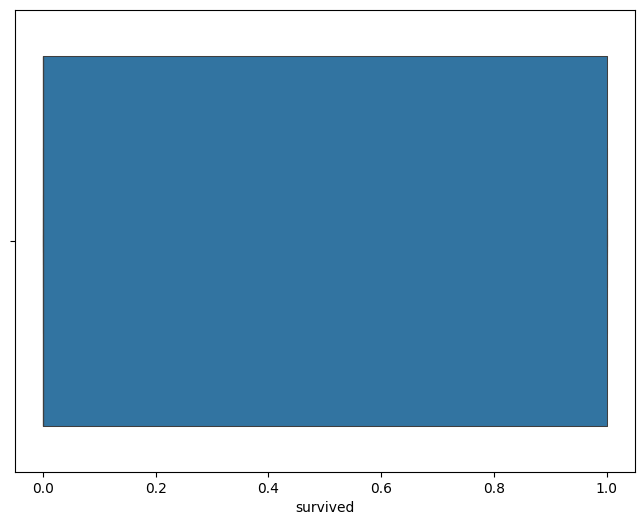

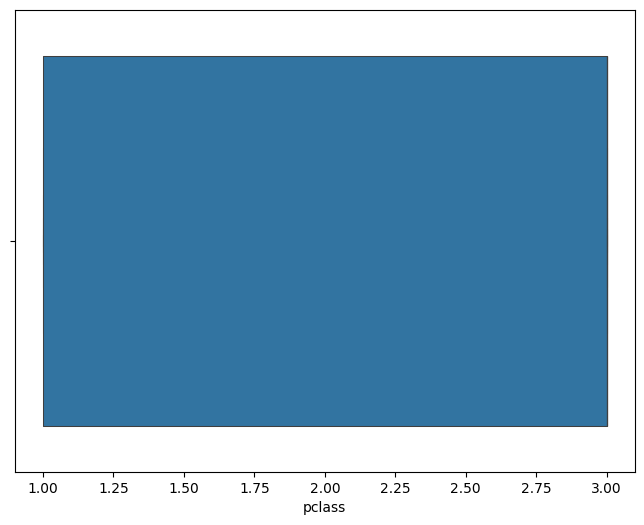

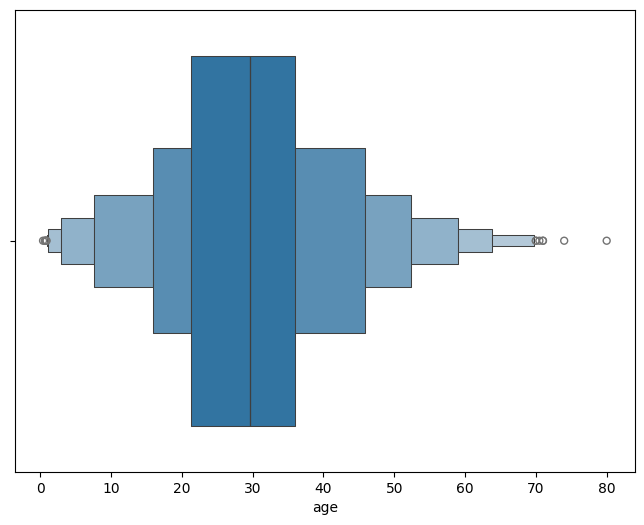

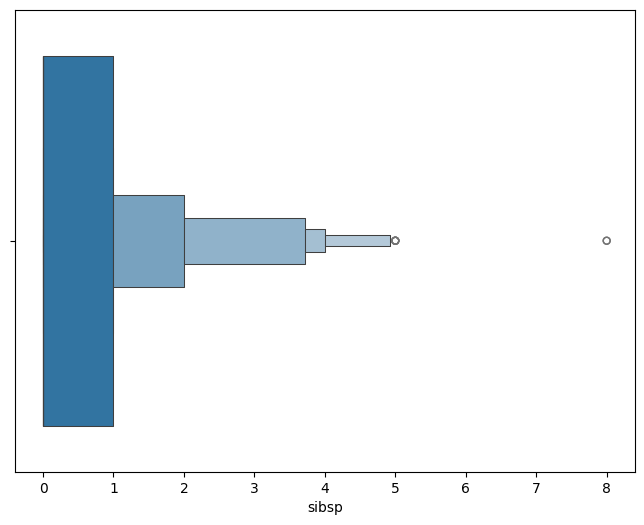

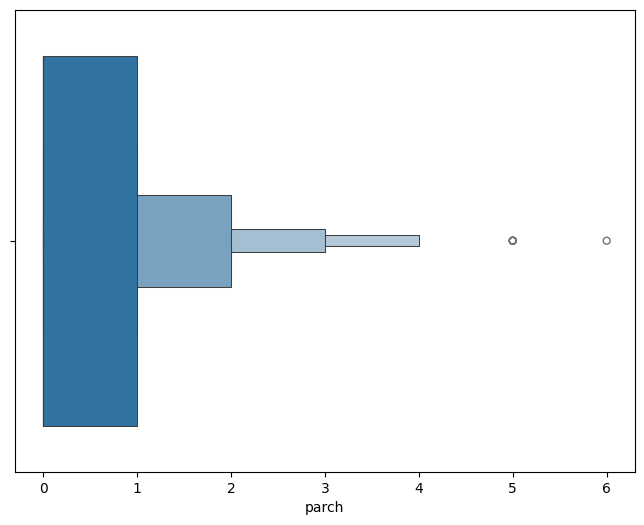

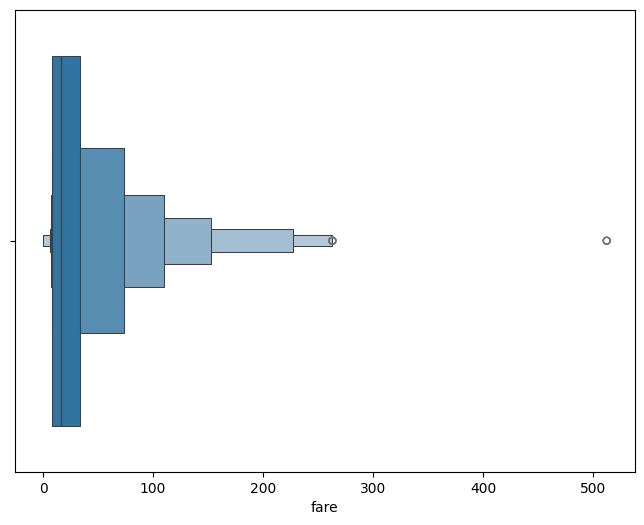

In [23]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(data=df,x=df[col])


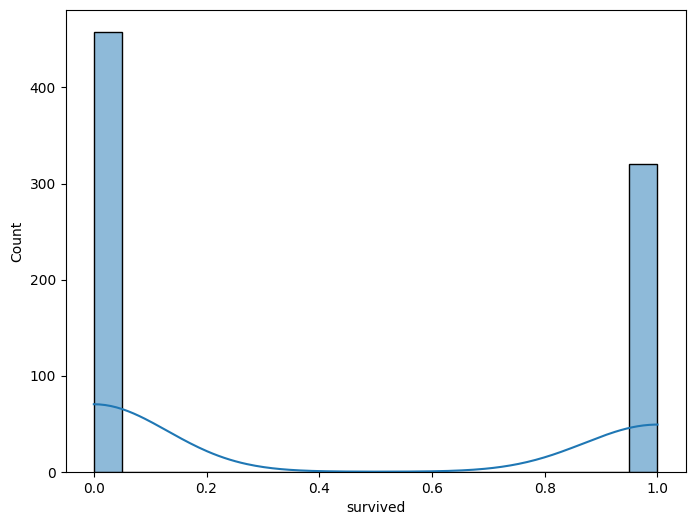

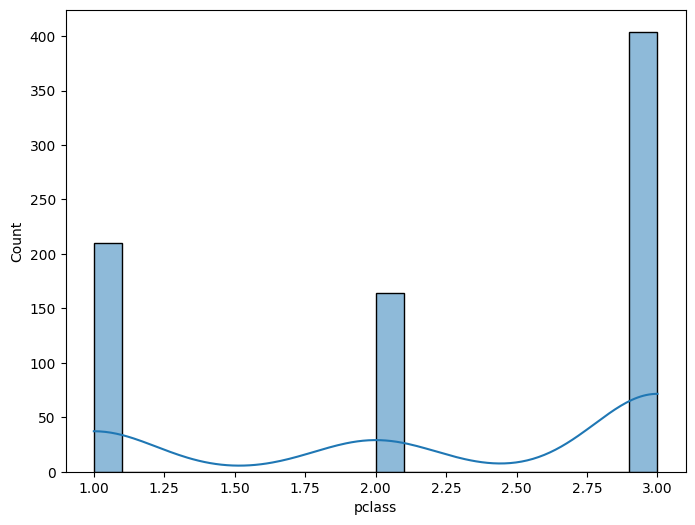

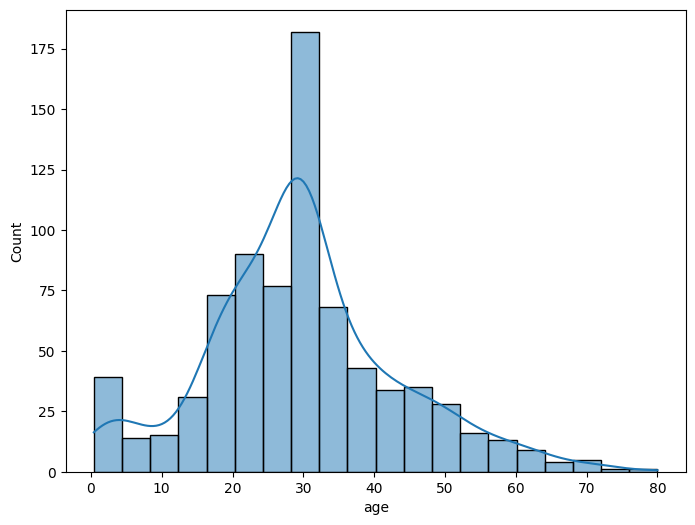

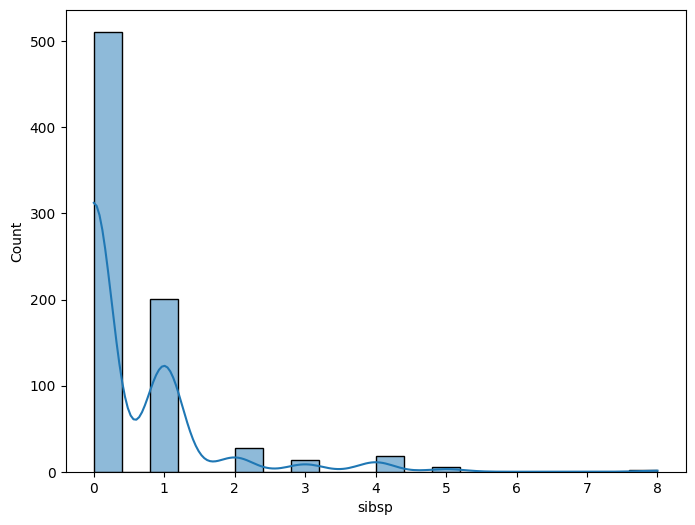

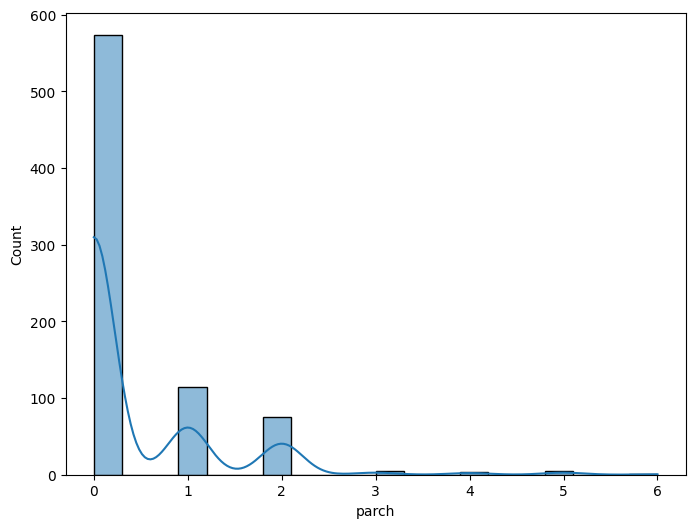

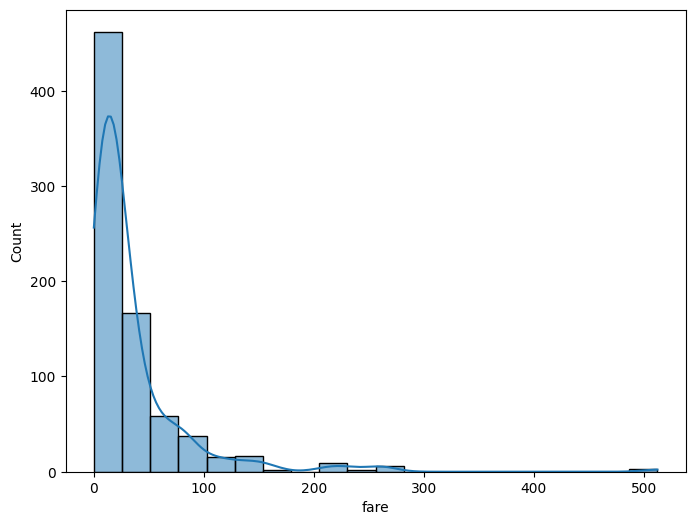

In [24]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],bins=20,kde=True)

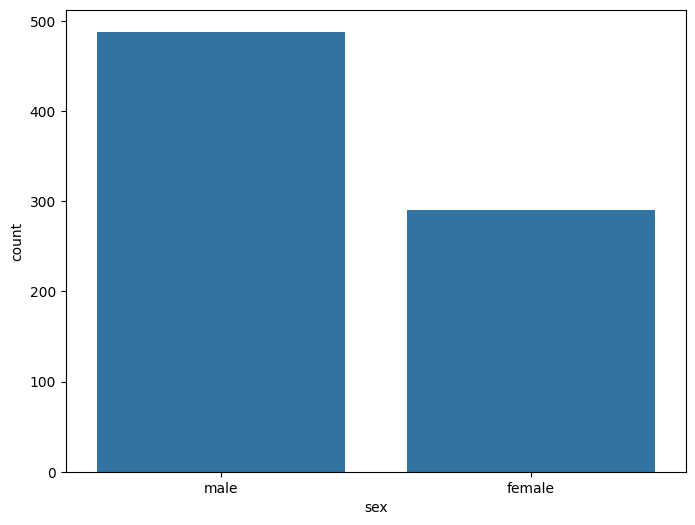

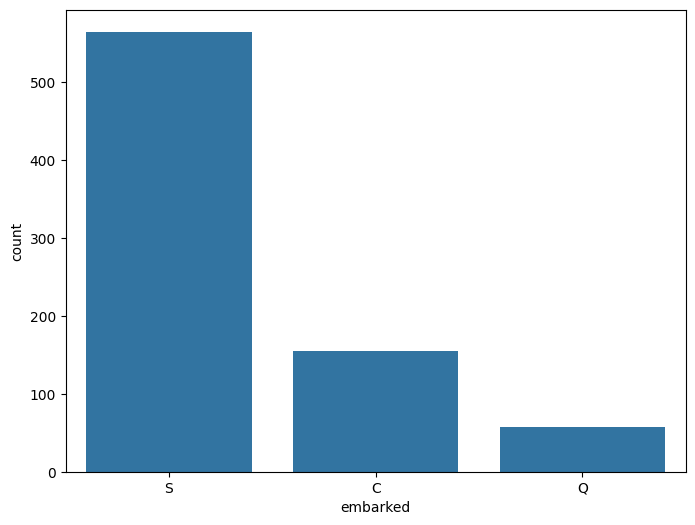

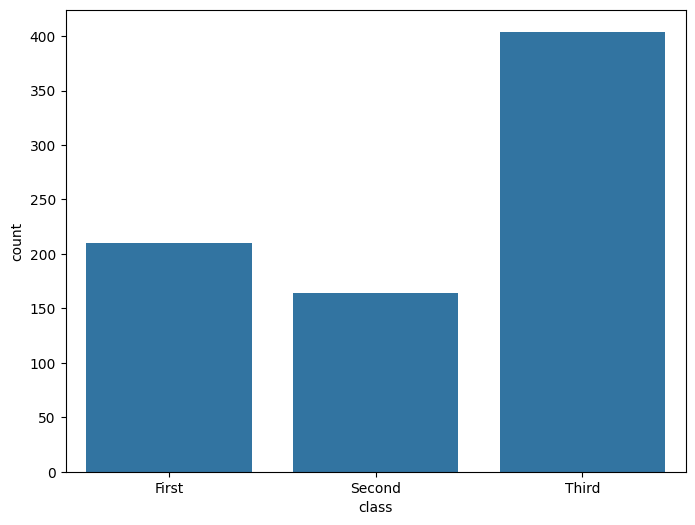

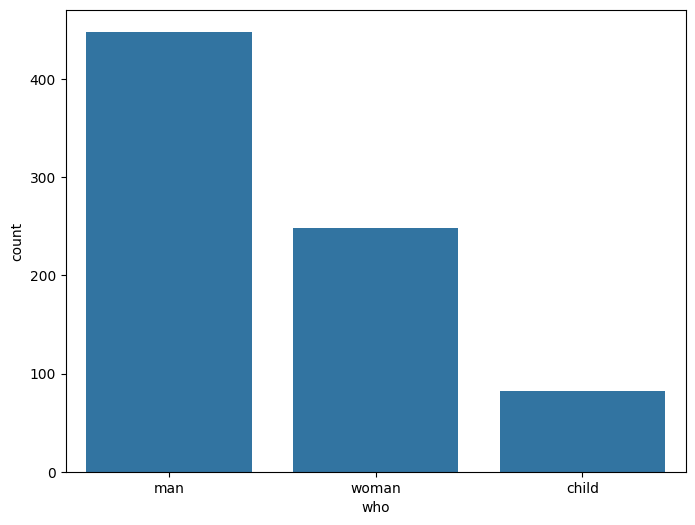

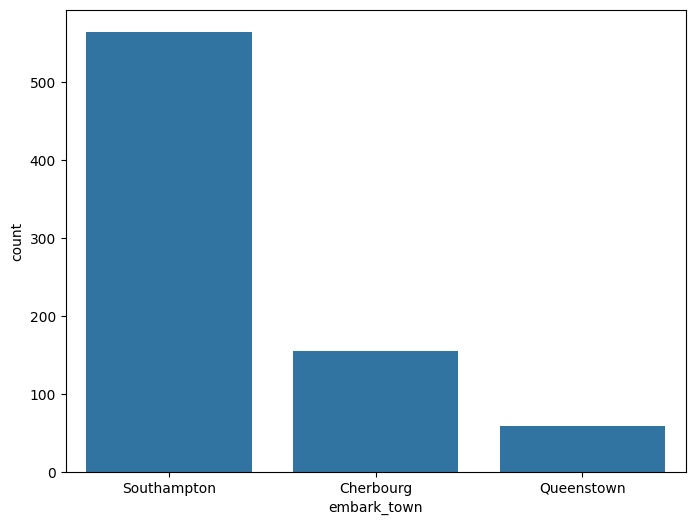

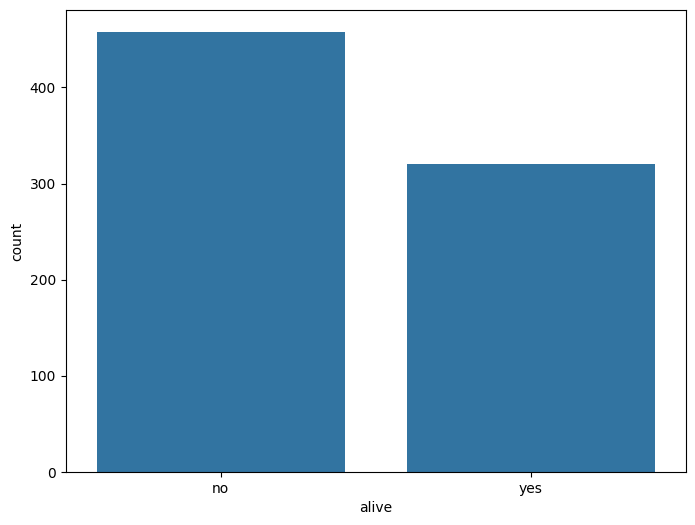

In [25]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(data=df,x=col)

In [28]:
label_en = [col for col in categorical if df[col].nunique() == 2]
hot_en = [col for col in categorical if df[col].nunique() > 2]
print(label_en)
print(hot_en)

['sex', 'alive']
['embarked', 'class', 'who', 'embark_town']


In [31]:
le = LabelEncoder()

In [32]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,0,True


In [34]:
df = pd.get_dummies(df,columns=hot_en)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,False,False,True,False,False,True,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,True,False,False,True,False,False,False,False,True,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,False,False,True,False,False,True,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,False,False,True,True,False,False,False,False,True,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,False,False,True,False,False,True,False,True,False,False,False,True


In [35]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
scaler = StandardScaler()

In [38]:
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [39]:
model = SVC(kernel="rbf",random_state=42)

In [43]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
acc = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

In [46]:
print("Accuracy: ",acc)
print("MAtrix: ",matrix)

Accuracy:  1.0
MAtrix:  [[91  0]
 [ 0 65]]
